# Best Neighborhood in Pittsburgh
## Team Six

---

## Introduction
*What does “the best neighborhood in Pittsburgh” mean to us?*

Put simply, we are looking for the neighborhood that we believe best represents the city of Pittsburgh at a cultural level. An important aspect of understanding our metrics is recognizing that we are specifically talking about Pittsburgh neighborhoods. What we deem important for cultural impacts in this project may not (and likely will not) apply when attempting to find the best neighborhoods in Seattle, New York, or even Philadelphia. We are focused on the qualities that make Pittsburgh unique, and whichever neighborhood best represents those qualities will be deemed the best by our standards.

During our planning, we briefly discussed using neighborhood safety and traffic to help determine the best neighborhood, but ultimately decided that cultural impact was more meaningful to us.

---

## Metric
In order to measure the cultural impact each neighborhood has, we looked at three key pieces of Pittsburgh’s culture. Considering Pittsburgh is the City of Bridges, we decided to take into account the quantity of bridges in each neighborhood. Sports like football and baseball are also a large part of the city’s culture, so we included data for the number of playing fields each neighborhood has. Lastly, we looked at the number of public art pieces in each neighborhood as the city is decorated with statues, murals, and memorials.

The datasets we used are [City of Pittsburgh Bridges](https://data.wprdc.org/dataset/city-of-pittsburgh-bridges), [City of Pittsburgh Playing Fields](https://data.wprdc.org/dataset/playing-fields), and [City of Pittsburgh Public Art](https://data.wprdc.org/dataset/city-of-pittsburgh-public-art). 

### Point System
In order to determine the best neighborhood, we ranked each of the neighborhoods by the quantities of bridges, playing fields, or art piececs (depending on the dataset used) and allocated points to the top five neighborhoods in each category. We used the following scale:

- First: 10 points
- Second: 7 points
- Third: 5 points
- Fourth: 3 points
- Fifth: 1 point

After evaluating each category, we added the total number of points each neighborhood recieved to determine the best neighborhood.

---

## Determining the Best Neighborhood
After determining our metric, we searched for the neighborhoods in which these quantities were the highest. We have determined that by our metric Squirrel Hill South is the best neighborhood in Pittsburgh. This was decided after observing its consistently high quantities of locations of cultural importance in the data sets that we chose to focus on. Squirrel Hill South ranked consistently near the top in all the areas we measured: it has the highest amount of bridges, playing fields, and art put together. Some neighborhoods have more of one factor like parks, but all in all Squirrel Hill South is the best across the three areas.

In [8]:
# imports for python
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas

### City Bridges (Jacob)

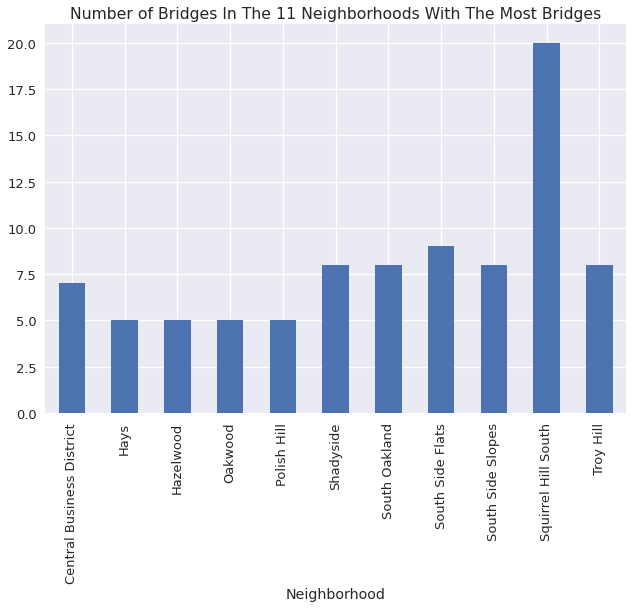

In [4]:
#import data
bridges_pandas = pd.read_csv("pittsburgh-city-bridges.csv", index_col="id")
#eliminate irrelevant columns
bridges_pandas = bridges_pandas[["start_neighborhood", "end_neighborhood"]]

#initiate a series of the number of bridges starting in each neighborhood
start = bridges_pandas["start_neighborhood"].value_counts() 
#initiate a series of the number of bridges ending in each neighborhood
end = bridges_pandas["end_neighborhood"].value_counts()

def filter_less_than (x, threshold):
    for i in x.Total_Bridges:
        if i > threshold:
            return True
        else:
            return False
#combine the two series and their values
#this series contains the number of bridges that 
#either start or end in each neighborhood
full = start.add(end, fill_value = 0)
#translate back to DataFrame for filtering
full_frame = pd.DataFrame({"Neighborhood":full.index
                           , "Total_Bridges":full.values})
#filter out neighborhoods with <4 bridges
filtered = full_frame.groupby("Neighborhood").filter(filter_less_than
                                                     , threshold = 4)
#turn the DataFrame into a Series to get rid of excess numbers
filtered_ser = pd.Series(filtered["Total_Bridges"].values
                         , index=filtered["Neighborhood"])

#plot and label (bar graphs cannot label y-axis)
plt.style.use('seaborn')
plt.style.use('seaborn-talk')
filtered_ser.plot(kind='bar', x='Neighborhood'
                  , title="Number of Bridges In The 11 Neighborhoods With The Most Bridges")

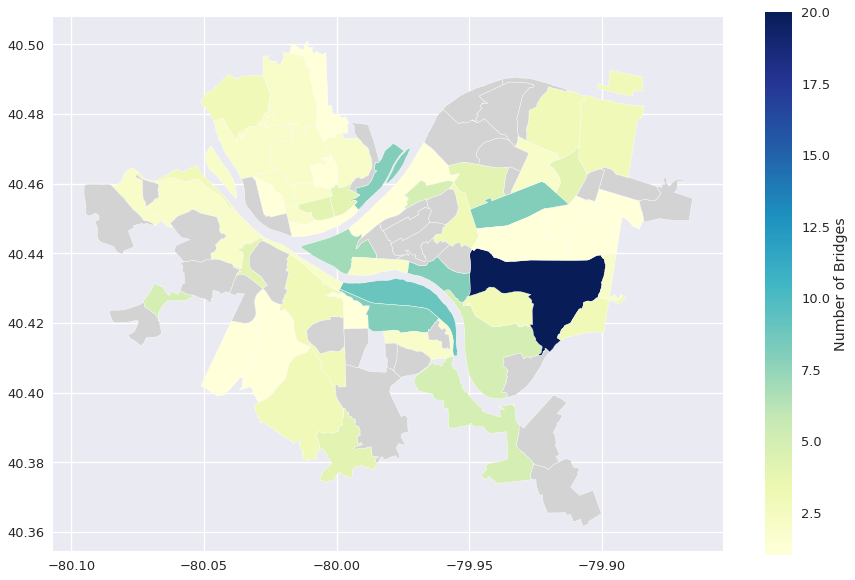

In [5]:
#create, name, and sort a series based on full_
num_bridges = pd.Series(full_frame["Total_Bridges"].values
                         , index=full_frame["Neighborhood"]
                         , name='number_of_bridges')
num_bridges = num_bridges.sort_values(ascending=False)
#import shapefile
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
#merge
bridges_map = neighborhoods.merge(num_bridges, how='left', left_on='hood', right_on='Neighborhood')
#plot the map
bridges_map.plot(column='number_of_bridges', # set the data to be used for coloring
               cmap='YlGnBu',              #color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Bridges"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set districts with no data to gray
               )

Points recieved after analyzing the number of bridges:
- Squirrel Hill South: 10
- South Side Flats: 7
- Shadyside, South Oakland, South Side Slopes, and Troy Hill: 5
- Central Business District: 3
- Hays, Hazelwood, Oakland, and Polish Hill: 1

### Playing Fields (Ben)
I used the following code to generate the bar graph containing the top ten neighborhoods and their parks. When dealing with the data, I originally made a bar graph showing literally every neighborhood, but cut it down to the top ten in order to make the visuals easy to understand and more useful.

Brighton Heights had the most parks with 7


<BarContainer object of 10 artists>

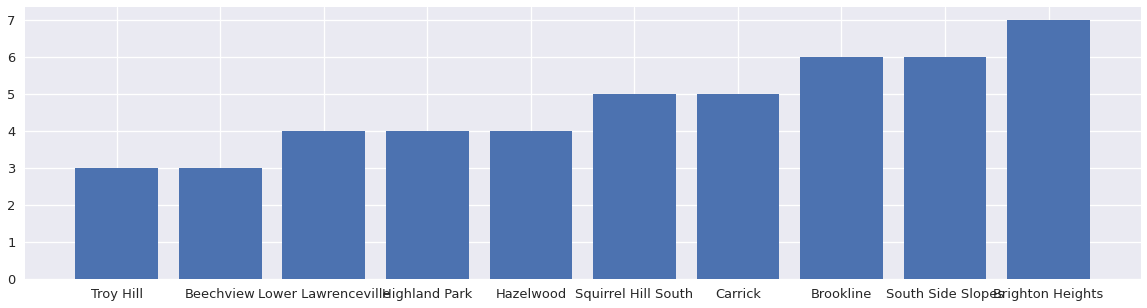

In [9]:
##read the file from the website
parkData = pd.read_csv("https://data.wprdc.org/datastore/dump/6af89346-b971-41d5-af09-49cfdb4dfe23")

##create a dictionary, intending to use neighborhoods as keys and times they were referenced as values
parkCounter = dict()

##going through neighborhood list and updating the counter when mentioned again
for row in parkData.index:
    park = parkData.iloc[row, 11]
    if park not in parkCounter:
        parkCounter[park] = 1
    else:
        parkCounter[park] = parkCounter[park] + 1
##this is old code that can be run to represent every single neighborhood in one bar graph
##keys = parkCounter.keys()
##values = parkCounter.values()

##f, ax = plt.subplots(figsize=(110,5))
##mpl.pyplot.bar(keys, values)

maxEntry = 0
indexNeighborhood = 0
for entry in parkCounter:
    if parkCounter[entry] > maxEntry:
        maxEntry = parkCounter[entry]
        indexNeighborhood = entry
print(indexNeighborhood + " had the most parks with " + str(maxEntry))

##selection sort for sorting the list of neighborhoods, decided to split the dictionary into key
##and value arrays so that I can index the lists more easily with iterating variables i and j
parkKeys = list(parkCounter.keys())
parkValues = list(parkCounter.values())
parkSorted = [parkValues[0]]
keysSorted = [parkKeys[0]]
for i in range(len(parkKeys)):
    min_idx = i
    for j in range(i+1, len(parkKeys)):
        if parkValues[min_idx] > parkValues[j]:
            min_idx = j
    parkValues[i], parkValues[min_idx] = parkValues[min_idx], parkValues[i]
    parkKeys[i], parkKeys[min_idx] = parkKeys[min_idx], parkKeys[i]
##finding the top ten of the sorted lists
topKeys = parkKeys[-10:]
topValues = parkValues[-10:]
##using matplotlib to include these values on a bar graph
f, ax = plt.subplots(figsize=(20,5))
mpl.pyplot.bar(topKeys, topValues)

Points recieved after analyzing the number of playing fields:
- Brighton Hills: 10
- South Side Slopes and Brookline: 7
- Squirrel Hill South and Carrick: 5
- Lower Lawrenceville and Highland Park: 3
- Troy Hill and Beechview: 1

### Public Art Pieces (Sam)
Lastly, for finding the neighborhood with the most public art pieces, I started by removing all of the unnecessary data and creating a new dataframe that included only the neighborhoods and the quantity of art pieces in each neighborhood. To keep the bar chart simple, I also decided to remove any neighborhoods with less than five public art peices since many had only one or two pieces.

In [8]:
# import data
artData = pd.read_csv("pitt-public-art.csv", index_col="id")

# exclude irrelevant columns
artData = artData[["neighborhood"]]

# find the number of public art pieces in each neighborhood
numArt = artData["neighborhood"].value_counts()

# create new dataframe with neighborhoods and number of art pieces
newArtFrame = pd.DataFrame({"neighborhood":numArt.index, "artPieces":numArt.values})

# function for filtering neighborhoods
def artThreshold (x, threshold):
    for i in x.artPieces:
        if i > threshold:
            return True
        else:
            return False

# remove all neighborhoods with less than five public art pieces
artFilter = newArtFrame.groupby("neighborhood").filter(artThreshold, threshold = 4)

Below is the final chart with the eleven remaining neighborhoods. From this, it is easy to see that Central Business District has the most public art pieces, followed by Squirrel Hill South.

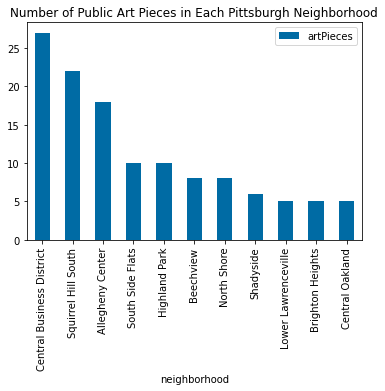

In [9]:
# plot and label
plt.style.use("tableau-colorblind10")
artFilter.plot(kind = "bar", x = "neighborhood", title = "Number of Public Art Pieces in Each Pittsburgh Neighborhood")

Points recieved after analyzing the number of public art pieces:
- Central Business District: 10
- Squirrel Hill South: 7
- Alleghent Center: 5
- South Side Flats and Highland Park: 3
- Beechview and North Shore: 1

Total points:
- Squirrel Hill South: 22
- Central Business District: 13
- South Side Slopes: 12
- South Side Flats and Brighton Heights: 10
- Brookline: 7

---

## Conclusions
### Jacob
When observing a city with such a title as “The City of Bridges”, it is very important to consider those vital pieces of architecture. Our metric of “best-ness” in relation to the neighborhoods in Pittsburgh was put in place in an attempt to bring forward those neighborhoods that stand out in the ways that make the city itself unique and special. The many pieces of art it holds, the quantity of playing fields, and the amount of bridges cause Squirrel Hill South to stand out against the other neighborhoods in the same ways that Pittsburgh stands out against other cities, so that cultural impact can not be understated. We had no intent to weigh the metric in favor of the quantity of bridges in each neighborhood, but Squirrel Hill South consistently stood out in each data set we observed. While it wasn’t the initial intent, and the metric is more involved than simply one statistic, it is only fitting that the greatest neighborhood in Pittsburgh is the one with the most bridges.

### Ben
Playing fields are an important part of the culture metric, and should be considered when measuring how culturally advanced a neighborhood is. Fields build communities around sports and include all ages. Children learn teamwork, and high schoolers practice for the school team. Parents watch their kids play, and friends organize games of sports. Parks are fun, and people gather around them. They’re free to use, so they’re open to anyone. Kids in the neighborhood can join in.

My personal favorite neighborhood isn’t what we chose. My favorite neighborhood is the one highest in my metric. Bias doesn’t play much of a part here, and I believe that my metric is the most effective when measuring culture. Bridges are part of our city’s identity, but can a community form around a bridge? For public art, can it be said to include as many different groups? Do kids go out of their way to view it (Public art is pretty great though)? My metric is the most inclusive and is most directly responsible for keeping communities alive. Therefore, I like the Breighton Heights neighborhood the best, since it has seven playing fields compared to Squirrel Hill’s five, and ranks the highest in Pittsburgh. Since I would weigh playing fields higher, I would choose the max from my list.

Our choice was a good compromise, though. Public art brings life to an area, and gives people something to do much like a park does. At the end of the day, bridges bring us together. Squirrel Hill South was high on all of these lists.

### Sam
There are roughly 90 unique neighborhoods in Pittsburgh, which makes finding the "best neighborhood" an incredibly daunting task. However, when looking at three important cultural metrics--city bridges, playing fields, and public art--it becomes clear that Squirrel Hill South is consistently in the top with 22 art pieces, 20 bridges, and 5 playing fields.

While I do love Squirrel Hill South, it isn't my favorite neighborhood. My favorite neighborhood here in Pittsburgh is Mt. Washington, mostly because it reminds me of a lot of towns back home in Maryland. It has the same welcoming, cozy feel as Berlin, MD with a similar historic feel to Annapolis. I was also able to visit there with a friend to find the Phantom Menace Vending Machine, which was a great memory to make.